In [96]:
import pandas as pd
import numpy as np
import missingno as msno

In [97]:
data = pd.read_excel("data/complete_dataset.xls")
data.head()

WARNING *** file size (5207429) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,code,gender,age,bmi_t1,spo_t1,cul_t1,alc_t1,nic_t1,veg_t1,rhy10_t1,pmh9_t1,dass_t1,pmh9_t2,dass_t2,FU,ms_t1,CH,match_group,match
0,2002219,1,21.0,20.132348,1,1,0,0,0,25,26,1,21,9,1,0,1,1.322603e+09,9557.0
1,2,0,20.0,20.528922,3,4,1,0,0,44,14,25,18,7,1,0,1,1.127196e+09,9555.0
2,151110900033,0,20.0,20.515086,4,4,3,1,1,40,27,3,99,99,0,0,1,1.127196e+09,9553.0
3,110153320,1,21.0,20.415225,2,4,0,0,0,14,19,1,26,1,1,0,1,1.322603e+09,9552.0
4,171112900048,1,21.0,18.066167,2,2,1,0,0,36,24,2,99,99,0,1,1,1.322603e+09,9551.0


In [98]:
cols = data.columns
print(cols)

Index(['code', 'gender', 'age', 'bmi_t1', 'spo_t1', 'cul_t1', 'alc_t1',
       'nic_t1', 'veg_t1', 'rhy10_t1', 'pmh9_t1', 'dass_t1', 'pmh9_t2',
       'dass_t2', 'FU', 'ms_t1', 'CH', 'match_group', 'match'],
      dtype='object')


In [99]:
wanted_cols  = ("bmi_t1", "spo_t1", "cul_t1", "alc_t1", "nic_t1", "rhy10_t1", "pmh9_t1", "dass_t1", "pmh9_t2", "dass_t2")

In [100]:
data_new = data.loc[:, wanted_cols]
data_new.head()

,bmi_t1,spo_t1,cul_t1,alc_t1,nic_t1,rhy10_t1,pmh9_t1,dass_t1,pmh9_t2,dass_t2
0,20.132348,1,1,0,0,25,26,1,21,9
1,20.528922,3,4,1,0,44,14,25,18,7
2,20.515086,4,4,3,1,40,27,3,99,99
3,20.415225,2,4,0,0,14,19,1,26,1
4,18.066167,2,2,1,0,36,24,2,99,99


In [101]:
wanted_cols  = ["bmi", "physical_activity", "mental_activity", "alcohol", "smoking", "social_rhythm", "positive_mental_score_t1", "negative_mental_score_t1", "positive_mental_score_t2", "negative_mental_score_t2"]

In [102]:
print(len(data_new.columns))
print(len(wanted_cols))

10
10


In [103]:
data_new.columns = wanted_cols

In [104]:
data_new.head()

,bmi,physical_activity,mental_activity,alcohol,smoking,social_rhythm,positive_mental_score_t1,negative_mental_score_t1,positive_mental_score_t2,negative_mental_score_t2
0,20.132348,1,1,0,0,25,26,1,21,9
1,20.528922,3,4,1,0,44,14,25,18,7
2,20.515086,4,4,3,1,40,27,3,99,99
3,20.415225,2,4,0,0,14,19,1,26,1
4,18.066167,2,2,1,0,36,24,2,99,99


In [105]:
data_new.shape

(15365, 10)

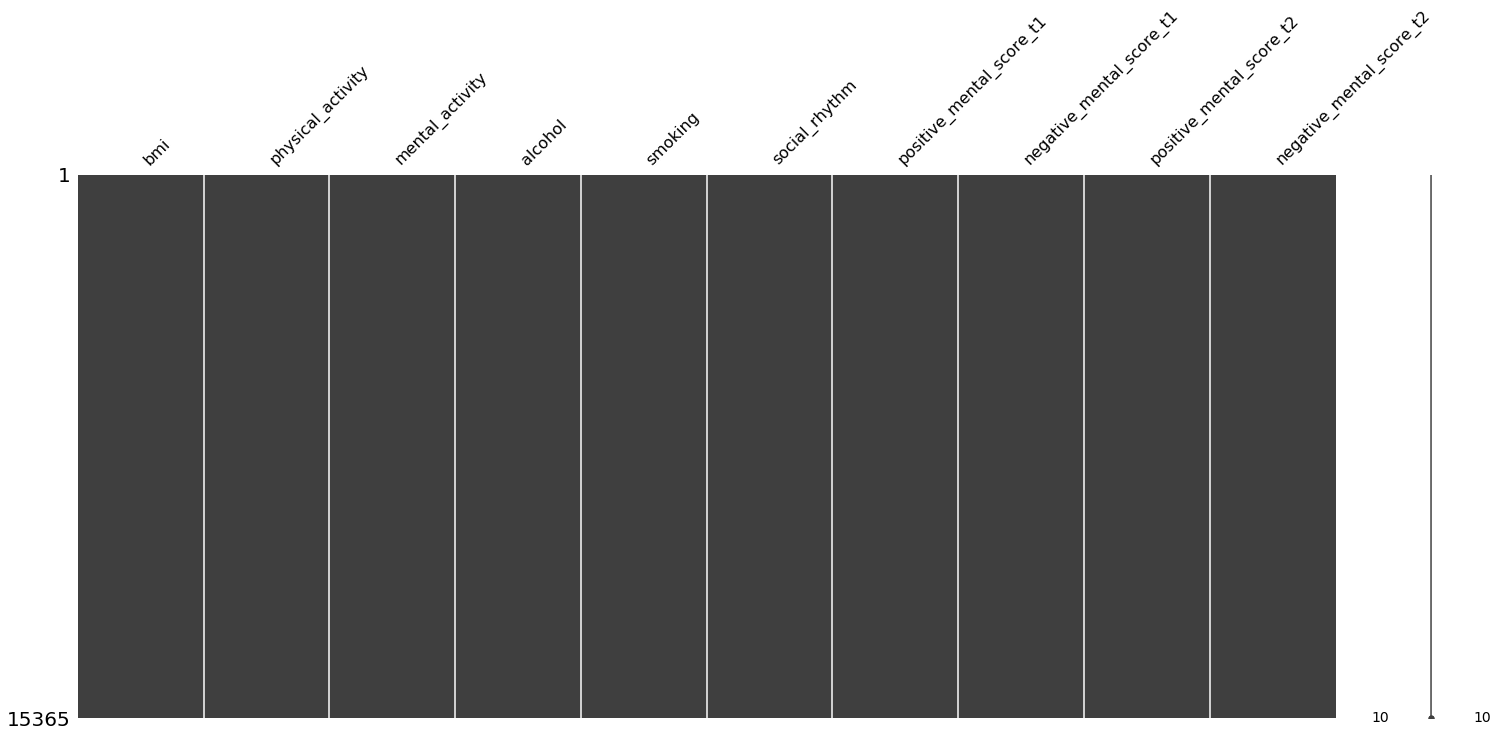

In [106]:
msno.matrix(data_new)

In [107]:
pos_1 = data_new.loc[:, "positive_mental_score_t1"]
pos_2 = data_new.loc[:, "positive_mental_score_t2"]
neg_1 = data_new.loc[:, "negative_mental_score_t1"]
neg_2 = data_new.loc[:, "negative_mental_score_t2"]

In [108]:
def get_composite_score(pos1, pos2, neg1, neg2):
    return pos1**2 + pos2**2 - neg1**2 - neg2**2

In [109]:
print(pos_1.loc[0])
print(pos_2.loc[0])
print(neg_1.loc[0])
print(neg_2.loc[0])

26
21
1
9


In [110]:
get_composite_score(pos_1.loc[0], pos_2.loc[0], neg_1.loc[0], neg_2.loc[0])

1035

In [111]:
composite_scores = []

for i in range(len(pos_1)):
    this_score = get_composite_score(pos_1.loc[i], pos_2.loc[i], neg_1.loc[i], neg_2.loc[i])
    composite_scores.append(this_score)

print(composite_scores[:10])

[1035, -154, 720, 1035, 572, 929, -103, 0, -369, -237]


In [115]:
input_cols  = ("bmi", "physical_activity", "mental_activity", "alcohol", "smoking", "social_rhythm")

In [116]:
data_new.head()

,bmi,physical_activity,mental_activity,alcohol,smoking,social_rhythm,positive_mental_score_t1,negative_mental_score_t1,positive_mental_score_t2,negative_mental_score_t2
0,20.132348,1,1,0,0,25,26,1,21,9
1,20.528922,3,4,1,0,44,14,25,18,7
2,20.515086,4,4,3,1,40,27,3,99,99
3,20.415225,2,4,0,0,14,19,1,26,1
4,18.066167,2,2,1,0,36,24,2,99,99


In [118]:
data_train = data_new.loc[:, input_cols]
data_train["score"] = composite_scores
data_train.head()

,bmi,physical_activity,mental_activity,alcohol,smoking,social_rhythm,score
0,20.132348,1,1,0,0,25,1035
1,20.528922,3,4,1,0,44,-154
2,20.515086,4,4,3,1,40,720
3,20.415225,2,4,0,0,14,1035
4,18.066167,2,2,1,0,36,572


In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd